<a href="https://colab.research.google.com/github/janmejay484/real-time-industry-insight-ai/blob/janmejay-dev/Realtime_Industry_Insight_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib


In [ ]:
!pip install openai tweepy prophet

In [ ]:
import openai, tweepy, pandas as pd, matplotlib.pyplot as plt

In [1]:
!pip install Wikipedia-API

  Preparing metadata (setup.py) ... done
  Created wheel for Wikipedia-API: filename=Wikipedia_API-0.8.1-py3-none-any.whl size=15383 sha256=c9096db83caa5d3e84de08ec4e431b3424fdaec14f3526e66311412b0a7966dd
  Stored in directory: /root/.cache/pip/wheels/33/3c/79/b36253689d838af4a0539782853ac3cc38a83a6591ad570dde
Successfully built Wikipedia-API


In [8]:

!pip install wikipedia-api textblob newsapi-python matplotlib seaborn wordcloud

In [9]:
import wikipediaapi, pandas as pd, re, requests
from textblob import TextBlob
from newsapi import NewsApiClient
import matplotlib.pyplot as plt, seaborn as sns
from wordcloud import WordCloud


In [21]:
company = "Genpact"   # you can change this to any company name


In [22]:
wiki = wikipediaapi.Wikipedia(user_agent='MyWikipediaApp/1.0', language='en')
page = wiki.page(company)
wiki_text = page.summary

df_wiki = pd.DataFrame([[wiki_text, "Wikipedia"]], columns=["text", "source"])
print("Wikipedia summary fetched successfully!")

Wikipedia summary fetched successfully!


In [23]:
newsapi = NewsApiClient(api_key='1e2314f549e24f26a8335db1186ce244')
articles = newsapi.get_everything(q=company, language='en', page_size=25)

news_list = [[a['title'] + " " + str(a['description']), "Google News"]
             for a in articles['articles']]
df_news = pd.DataFrame(news_list, columns=["text", "source"])
print("News data fetched successfully!")


News data fetched successfully!


In [24]:
df_all = pd.concat([df_wiki, df_news], ignore_index=True)
print("Combined dataset size:", len(df_all))


Combined dataset size: 26


In [25]:
def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)
    return text.lower().strip()

df_all["cleaned"] = df_all["text"].apply(clean_text)


In [26]:
df_all["sentiment"] = df_all["cleaned"].apply(lambda x: TextBlob(x).sentiment.polarity)
df_all.head()


,text,source,cleaned,sentiment
0,Genpact Ltd. is an American information techno...,Wikipedia,genpact ltd is an american information technol...,0.194545
1,Genpact (NYSE:G) & Unisys (NYSE:UIS) Financial...,Google News,genpact nyseg unisys nyseuis financial analys...,0.375000
2,"Wedge Capital Management L L P NC Sells 8,800 ...",Google News,wedge capital management l l p nc sells 8800 s...,0.093878
3,"Signaturefd LLC Has $777,000 Stock Position in...",Google News,signaturefd llc has 777000 stock position in g...,0.057143
4,Ballentine Partners LLC Boosts Holdings in Gen...,Google News,ballentine partners llc boosts holdings in gen...,0.093878


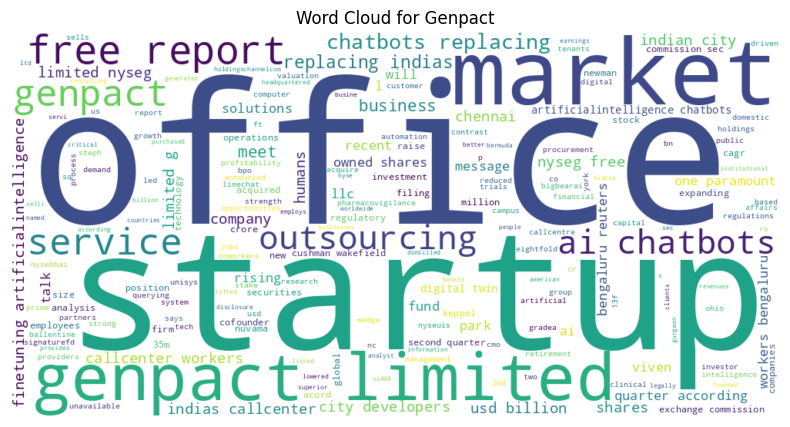

In [27]:
text_corpus = " ".join(df_all["cleaned"])
wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(text_corpus)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(f"Word Cloud for {company}")
plt.show()


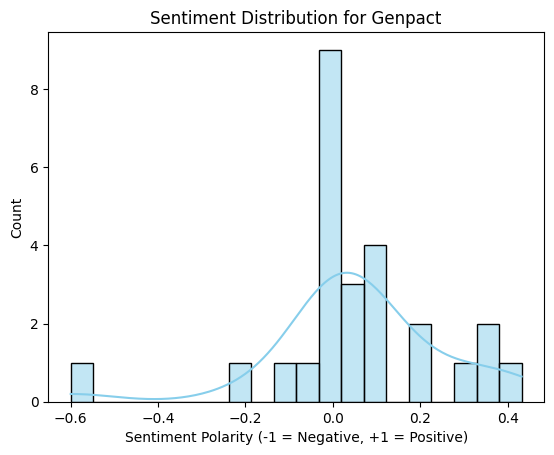

In [28]:
sns.histplot(df_all["sentiment"], bins=20, kde=True, color='skyblue')
plt.title(f"Sentiment Distribution for {company}")
plt.xlabel("Sentiment Polarity (-1 = Negative, +1 = Positive)")
plt.ylabel("Count")
plt.show()
